# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os

os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
transforms = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms)

# Create training set and define training DataLoader
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Create test set and define test DataLoader
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Display the size and shape of the training data
print(f'Training dataset size: {len(train_dataset)} images')
print(f'Shape of one image in the training dataset: {train_dataset[0][0].shape}')
print(f'Number of batches in the training DataLoader: {len(train_loader)}')

# Display the size and shape of the test data
print(f'Test dataset size: {len(test_dataset)} images')
print(f'Shape of one image in the test dataset: {test_dataset[0][0].shape}')
print(f'Number of batches in the test DataLoader: {len(test_loader)}')

Training dataset size: 60000 images
Shape of one image in the training dataset: torch.Size([1, 28, 28])
Number of batches in the training DataLoader: 938
Test dataset size: 10000 images
Shape of one image in the test dataset: torch.Size([1, 28, 28])
Number of batches in the test DataLoader: 157


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?


**I converted the dataset to be a tensor, because this is the base data structure managed by PyTorch, so it's a crucial step. It was not needed to perform other transformation because the images doesn't have angles or different shapes, this step depend enterily on the dataset**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Show 5 images from train DataLoader
3


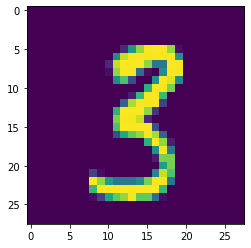

4


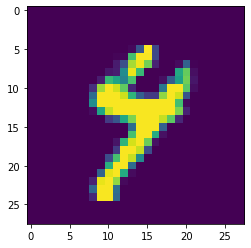

0


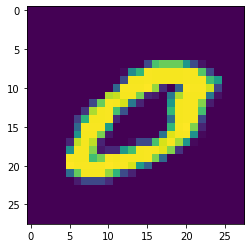

4


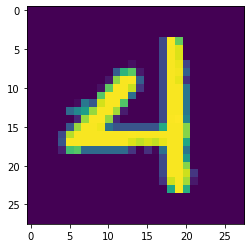

5


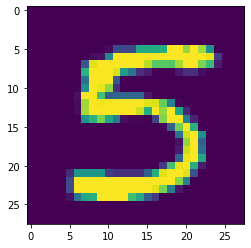

In [6]:
# Explore data
print("Show 5 images from train DataLoader")
show5(train_loader)


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
class LinNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28 * 1, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.layer4(x)
        return x

model = LinNet()
print(model)

LinNet(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=10, bias=True)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
# Choose an optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

LinNet(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=10, bias=True)
)

Plot the training loss (and validation loss/accuracy, if recorded).

Epoch [1/10], Batch [250], Loss: 0.6032
Epoch [1/10], Batch [500], Loss: 0.4274
Epoch [1/10], Batch [750], Loss: 0.3456
Epoch [1/10], Training Loss: 0.3076, Validation Loss: 0.1363, Validation Accuracy: 95.86%
Epoch [2/10], Batch [250], Loss: 0.1297
Epoch [2/10], Batch [500], Loss: 0.1239
Epoch [2/10], Batch [750], Loss: 0.1183
Epoch [2/10], Training Loss: 0.1141, Validation Loss: 0.0965, Validation Accuracy: 97.07%
Epoch [3/10], Batch [250], Loss: 0.0786
Epoch [3/10], Batch [500], Loss: 0.0772
Epoch [3/10], Batch [750], Loss: 0.0759
Epoch [3/10], Training Loss: 0.0749, Validation Loss: 0.0900, Validation Accuracy: 97.26%
Epoch [4/10], Batch [250], Loss: 0.0529
Epoch [4/10], Batch [500], Loss: 0.0552
Epoch [4/10], Batch [750], Loss: 0.0567
Epoch [4/10], Training Loss: 0.0564, Validation Loss: 0.0747, Validation Accuracy: 97.79%
Epoch [5/10], Batch [250], Loss: 0.0451
Epoch [5/10], Batch [500], Loss: 0.0445
Epoch [5/10], Batch [750], Loss: 0.0450
Epoch [5/10], Training Loss: 0.0465, Val

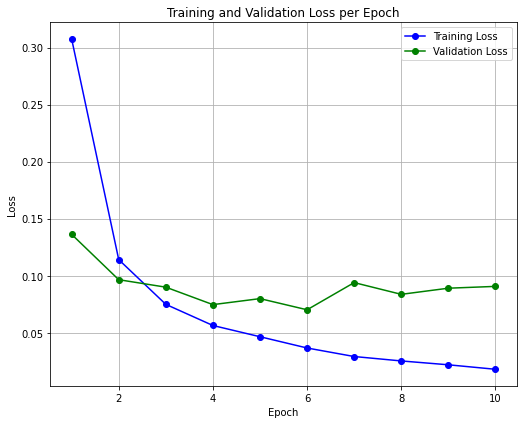

In [10]:
def train(model, train_loader, criterion, optimizer, test_loader, num_epochs=5):
    model.train()
    epoch_losses = []
    validation_losses = []
    validation_accuracies = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            if (i + 1) % 250 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}], Loss: {running_loss / (i + 1):.4f}')
        
        avg_loss = running_loss / len(train_loader)
        epoch_losses.append(avg_loss)
        
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        avg_val_loss = val_loss / len(test_loader)
        accuracy = 100 * correct / total
        validation_losses.append(avg_val_loss)
        validation_accuracies.append(accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {avg_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
    
    return epoch_losses, validation_losses, validation_accuracies

num_epochs = 10
epoch_losses, validation_losses, validation_accuracies = train(model, train_loader, criterion, optimizer, test_loader, num_epochs)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o', color='b', label='Training Loss')
plt.plot(range(1, num_epochs + 1), validation_losses, marker='o', color='g', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
def evaluate(model, test_loader):
    model.eval()  # Cambia el modelo a modo de evaluación
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test images: {accuracy:.2f}%')
    return accuracy

# Evaluar el modelo en el conjunto de prueba
accuracy = evaluate(model, test_loader)


Accuracy of the model on the test images: 97.93%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

LinNet(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=10, bias=True)
)
Epoch [1/10], Batch [250], Loss: 0.0170
Epoch [1/10], Batch [500], Loss: 0.0170
Epoch [1/10], Batch [750], Loss: 0.0188
Epoch [1/10], Training Loss: 0.0181, Validation Loss: 0.0996, Validation Accuracy: 97.92%
Epoch [2/10], Batch [250], Loss: 0.0142
Epoch [2/10], Batch [500], Loss: 0.0153
Epoch [2/10], Batch [750], Loss: 0.0165
Epoch [2/10], Training Loss: 0.0176, Validation Loss: 0.0960, Validation Accuracy: 97.62%
Epoch [3/10], Batch [250], Loss: 0.0076
Epoch [3/10], Batch [500], Loss: 0.0079
Epoch [3/10], Batch [750], Loss: 0.0091
Epoch [3/10], Training Loss: 0.0117, Validation Loss: 0.0936, Validation Accuracy: 97.77%
Epoch [4/10], Batch [250], Loss: 0.0112
Epoch [4/10], Batch [500], Loss: 0.0116
Epoch [4/10], Batch [75

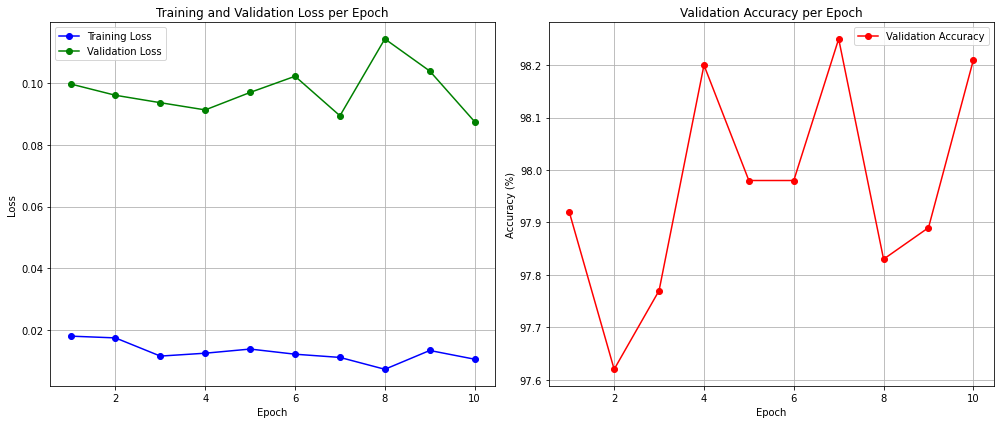

In [12]:
class EnhancedNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.layer5(x)
        return x

enhanced_model = EnhancedNet().to(device)
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, train_loader, criterion, optimizer, test_loader, num_epochs=10):
    model.train()
    epoch_losses = []
    validation_losses = []
    validation_accuracies = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            if (i + 1) % 250 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}], Loss: {running_loss / (i + 1):.4f}')
        
        avg_loss = running_loss / len(train_loader)
        epoch_losses.append(avg_loss)
        
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        avg_val_loss = val_loss / len(test_loader)
        accuracy = 100 * correct / total
        validation_losses.append(avg_val_loss)
        validation_accuracies.append(accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {avg_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
    
    return epoch_losses, validation_losses, validation_accuracies

def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test images: {accuracy:.2f}%')
    return accuracy

num_epochs = 10
epoch_losses, validation_losses, validation_accuracies = train(model, train_loader, criterion, optimizer, test_loader, num_epochs)

accuracy = evaluate(model, test_loader)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o', color='b', label='Training Loss')
plt.plot(range(1, num_epochs + 1), validation_losses, marker='o', color='g', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), validation_accuracies, marker='o', color='r', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Saving your model
Using `torch.save`, save your model for future loading.

In [13]:
torch.save(model, "model.pth")
torch.save(enhanced_model, "enhanced_model.pth")